# ImmoEliza Data Analysis

**This repository is contains Data Analysis for a fictional real estate company called "ImmoEliza". I created it as part of my [BeCode](https://www.becode.org) AI Bootcamp training in 2023.**

The data used in this project was sourced from the repository [ImmoEliza: Collecting Data](https://github.com/DeFre/ImmoEliza-collecting-data) which was used to collect data on 10.000 properties from Immoweb.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import time

pd.set_option('display.min_rows', 10)

## Import Data

In [2]:
properties_raw = pd.read_csv("../data/scraped_data_10_Myt.csv")
display(properties_raw)

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Number of frontages,Construction year,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type
0,penthouse,turnhout,2300,10666429,€,Grote Markt 22,4,C,218,No,...,4,1997,As new,0,1,0,0,2,0,Gas
1,house,essen,2910,10666428,€469000,Heidestatiestraat 26,3,D,390,No,...,4,0,0,0,1,0,0,2,Installed,0
2,house,bierges,1301,10666426,€1395000,"Rue de Wavre, 27",5,C,178,0,...,4,1988,Good,0,2,3,Yes,4,Hyper equipped,Fuel oil
3,apartment,arlon,6700,10666424,€285000,Avenue de Longwy 340,2,D,299,0,...,2,0,Good,0,2,0,0,2,Installed,Electric
4,house,arlon,6700,10666423,€285000,Avenue de Longwy 340,2,D,299,0,...,2,0,Good,0,2,0,0,2,Installed,Electric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,villa,schilde,2970,10642946,€1199000,Donksesteenweg 212,6,B,199,No,...,0,0,As new,0,2,0,No,3,Installed,Gas
10135,duplex,bierbeek%20korbeek-lo,3360,10531808,€450000,Herbert Hooverplein 14,3,B,120,No,...,2,2007,Good,0,2,0,0,0,Hyper equipped,Gas
10136,penthouse,braine-l%27alleud,1420,10642943,€699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,No,...,3,2021,0,0,2,0,0,0,0,0
10137,house,wevelgem,8560,10642937,€340000,Markeplaats 9,4,B,161,0,...,0,1967,0,0,0,0,No,0,0,0


## Cleaning Data

### Remove "empty" rows and rows without a price

In [3]:
# Remove "empty" rows and rows without a price

print(properties_raw.shape[0])
#properties_raw = properties_raw.drop(properties_raw[(properties_raw.Price == 0) & (properties_raw.Address == 0) & (properties_raw.Bedrooms == 0) & (properties_raw.Furnished == 0)].index, inplace=True) #remove lines full of 0
properties_raw = properties_raw[properties_raw.loc[:, "Address"].astype(str).str.strip() != '0'] #solution by Jonathan #removes "empty" rows
print(properties_raw.shape[0])
properties_raw = properties_raw[properties_raw.loc[:, "Price"].astype(str).str.strip() != '€'] #removes rows without a price
#display(properties_raw)
print(properties_raw.shape[0])


10139
9446
8977


### Remove all non-numerical data from Price

In [4]:
# Remove all non-numerical data from Price, drop properties without a price and with prices over 3M or under 10K

print("number of properties before: ",properties_raw.shape[0])
properties_raw["Price2"] = properties_raw.loc[:, "Price"].str.replace("\D", "", regex = True)
properties_raw = properties_raw[properties_raw.loc[:, "Price2"].astype(str).str.strip() != ''] #remove rows without a price
properties_raw["Price2"] = properties_raw["Price2"].astype(int) #Turn "Price 2 into an Integer"
properties_raw = properties_raw.drop(properties_raw[properties_raw['Price2'] > 30000000].index) #removes properties costing more than 3M
properties_raw = properties_raw.drop(properties_raw[properties_raw['Price2'] < 9999].index) #removes properties costing less than 10K
print("number of properties after: ",properties_raw.shape[0])



number of properties before:  8977
number of properties after:  8700


In [5]:
# Turn Price into an integer but keep the original Price column a Price_orig
properties_raw["Price_orig"] = properties_raw["Price"]
properties_raw["Price"] = properties_raw["Price2"]
properties_raw = properties_raw.drop(columns=["Price2"])
display(properties_raw)

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Construction year,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price_orig
1,house,essen,2910,10666428,469000,Heidestatiestraat 26,3,D,390,No,...,0,0,0,1,0,0,2,Installed,0,€469000
2,house,bierges,1301,10666426,1395000,"Rue de Wavre, 27",5,C,178,0,...,1988,Good,0,2,3,Yes,4,Hyper equipped,Fuel oil,€1395000
3,apartment,arlon,6700,10666424,285000,Avenue de Longwy 340,2,D,299,0,...,0,Good,0,2,0,0,2,Installed,Electric,€285000
4,house,arlon,6700,10666423,285000,Avenue de Longwy 340,2,D,299,0,...,0,Good,0,2,0,0,2,Installed,Electric,€285000
5,apartment,antwerp,2000,10666422,425000,"Grote steenweg, 511",2,C,254,0,...,0,As new,0,1,0,0,0,Installed,0,€425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,villa,schilde,2970,10642946,1199000,Donksesteenweg 212,6,B,199,No,...,0,As new,0,2,0,No,3,Installed,Gas,€1199000
10135,duplex,bierbeek%20korbeek-lo,3360,10531808,450000,Herbert Hooverplein 14,3,B,120,No,...,2007,Good,0,2,0,0,0,Hyper equipped,Gas,€450000
10136,penthouse,braine-l%27alleud,1420,10642943,699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,No,...,2021,0,0,2,0,0,0,0,0,€699000
10137,house,wevelgem,8560,10642937,340000,Markeplaats 9,4,B,161,0,...,1967,0,0,0,0,No,0,0,0,€340000


### Turns Furnished, Terrace & Office Binary

In [6]:
# Turn Yes/No into 1/0

for i in ["Furnished", "Terrace", "Office"]:
    print(properties_raw[[i]].value_counts())
    properties_raw[i] = properties_raw[i].map({'Yes': 1, 'No': 0, '0':0, 0:0, 1:1})
    print(properties_raw[[i]].value_counts())
#display(properties_raw)

Furnished
0            4441
No           4013
Yes           246
Name: count, dtype: int64
Furnished
0            8454
1             246
Name: count, dtype: int64
Terrace
0          6425
Yes        2275
Name: count, dtype: int64
Terrace
0          6425
1          2275
Name: count, dtype: int64
Office
0         5462
No        2016
Yes       1222
Name: count, dtype: int64
Office
0         7478
1         1222
Name: count, dtype: int64


There seem to be a lot of properties marked as not having terrace, yet including a terrace surface. If a property has a terrace surface we will assume this implies it has a terrace. Will this make a difference?

In [7]:
properties_raw["Terrace2"] = np.where(properties_raw["Terrace surface"] !=0, 1, properties_raw["Terrace"])
print(properties_raw["Terrace"].value_counts())
print(properties_raw["Terrace2"].value_counts())

Terrace
0    6425
1    2275
Name: count, dtype: int64
Terrace2
1    5219
0    3481
Name: count, dtype: int64


Yes. As you can see the number of terraces has more than doubled. 

In [8]:
# Replace the values in Terrace with the ones from Terrace2 and drop Terrace
properties_raw["Terrace"] = properties_raw["Terrace2"]
properties_raw = properties_raw.drop(["Terrace2"], axis=1)

### Property type & subtype
The column "Type of property" is a bit too specific. We will create two *supertypes* called "house" and "apartment" as they are not included in our scrape. 
Afterwards we will refer to these two supertypes as *"property_type"* and use *"property_subtype"* to refer to "kot", "castle", "villa", ...

In [9]:
properties_raw.rename(columns = {'Type of property':'property_subtype'}, inplace = True)
df_proptype = pd.read_csv("../data/propertytype.csv", encoding="latin-1")
properties_raw = properties_raw.merge(df_proptype, on=['property_subtype'], how='left')
properties_raw.sample(10)

,property_subtype,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price_orig,property_type
3623,apartment,mechelen,2800,10657158,285000,Oscar Van Kesbeeckstraat 7,3,D,378,0,...,Good,0,1,0,0,1,Installed,Gas,€285000,apartment
3362,penthouse,heist,8301,10279397,550000,Lippenslaan 116,3,F,605,0,...,0,0,1,0,0,0,0,Gas,€550000,apartment
3231,house,mouscron,7700,10658295,139900,Gistelsesteenweg 291,3,A++,717,0,...,0,0,0,0,0,0,0,0,€139900,house
86,apartment,leuven,3000,10666242,298000,Jan Stasstraat 3,1,B,166,0,...,0,0,1,0,0,0,0,Gas,€298000,apartment
132,exceptional-property,hasselt,3500,10666184,524900,"Het Dorlik, 16",3,C,240,0,...,0,0,1,0,0,0,Installed,Gas,€524900,house
5044,house,molenbeek-saint-jean,1080,10653691,200000,Rue Royale 178,6,G,538,0,...,Good,0,2,2,1,2,Hyper equipped,Fuel oil,€200.000!),house
5385,apartment,gent,9000,10652882,390000,F. Rooseveltlaan 350K,2,B,111,0,...,Good,0,0,1,0,1,Installed,Gas,€390000,apartment
6378,apartment,bekkevoort,3460,10649846,245000,Hoogstraat 2 bus 1,2,D,324,0,...,Good,0,0,0,0,1,Installed,Electric,€245000,apartment
4604,house,olen,2250,10654723,409000,PARKLAAN 46,6,C,241,0,...,Good,0,1,0,0,2,0,Gas,€409000,house
8603,new-real-estate-project-houses,dessel,2480,10643209,362902,Merksplassesteenweg 18,0,Not specified,Not specified,0,...,0,0,0,0,0,0,0,0,€362902,house


### Energy Class
Due to differences in definition in each region, it will be very hard to compare energy classes. But before we can discover that we have a bit of cleaning up to do. Our dataset includes a few weird Energy Classes ('G_F', 'C_B', 'G_A++'). As each of them only occurs once, we will add them to "not specified". Now the different categories at least look "normal".

In [10]:
#There were 3 weird variables in Energy Class with only one occurence, namely 'G_F', 'C_B', 'G_A++'. Added them tot "Not specified"

properties_raw["Energy class"]=np.where(properties_raw["Energy class"].isin(['G_F', 'C_B', 'G_A++']), "Not specified", properties_raw["Energy class"])

In [11]:
print(properties_raw[["Energy class"]].value_counts())

Energy class 
Not specified    1954
B                1386
C                1299
D                1100
F                1083
E                 793
A                 560
G                 471
A++                31
A+                 23
Name: count, dtype: int64


### Cleaning Postal codes
Postal Codes should be 4 numeric digits, but we have some errors. 

In [12]:
print("before:",properties_raw.shape[0])
properties_raw.rename(columns = {'postal code':'Postcode'}, inplace = True)
properties_raw["Postcode"] = properties_raw.loc[:, "Postcode"].astype(str).str.replace("\D", "", regex = True)
properties_raw['Postcode'] = properties_raw['Postcode'].astype(int)
properties_raw = properties_raw.drop(properties_raw[properties_raw['Postcode'] > 9999].index) #removes postal codes over 4 digits
print("after removing too high numbers:",properties_raw.shape[0])
properties_raw = properties_raw.drop(properties_raw[properties_raw['Postcode'] < 999].index) #removes postal codes of less than 4 digits
print("after:",properties_raw.shape[0])

before: 8700
after removing too high numbers: 8595
after: 8595


### Add Regions

In [13]:
df_localities = pd.read_csv("../data/postal_code-municipality-province.csv", encoding="latin-1")
df_localities = df_localities[['Postcode', 'Provincie']].drop_duplicates().reset_index(drop=True)
print(df_localities.head())

   Postcode                       Provincie
0      1000  Brussels Hoofdstedelijk Gewest
1      1030  Brussels Hoofdstedelijk Gewest
2      1040  Brussels Hoofdstedelijk Gewest
3      1050  Brussels Hoofdstedelijk Gewest
4      1060  Brussels Hoofdstedelijk Gewest


In [14]:
df_localities['Gemeenschap'] = np.where(
    df_localities.Provincie.isin(['Vlaams-Brabant', 'Antwerpen', 'Limburg', 'West-Vlaanderen', 'Oost-Vlaanderen']),
    'Flanders',
    np.where(df_localities.Provincie == 'Brussels Hoofdstedelijk Gewest',
             'Brussels',
             'Wallonia'
    )
)

In [15]:
df_localities["Postcode"].astype(int)
df_localities["Provincie"].astype(str)
df_localities["Gemeenschap"].astype(str)

0       Brussels
1       Brussels
2       Brussels
3       Brussels
4       Brussels
          ...   
1138    Flanders
1139    Flanders
1140    Flanders
1141    Flanders
1142    Flanders
Name: Gemeenschap, Length: 1143, dtype: object

In [16]:
df_localities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Postcode     1143 non-null   int64 
 1   Provincie    1143 non-null   object
 2   Gemeenschap  1143 non-null   object
dtypes: int64(1), object(2)
memory usage: 26.9+ KB


In [17]:
print(df_localities.sample(10))

      Postcode        Provincie Gemeenschap
656       2491        Antwerpen    Flanders
429       7090          Hainaut    Wallonia
585       9880  Oost-Vlaanderen    Flanders
677       3191   Vlaams-Brabant    Flanders
781       4701          Liï¿½ge    Wallonia
686       3294   Vlaams-Brabant    Flanders
924       6782       Luxembourg    Wallonia
942       6856       Luxembourg    Wallonia
1000      7538          Hainaut    Wallonia
403       6830       Luxembourg    Wallonia


In [18]:
properties_raw = properties_raw.merge(df_localities, on=['Postcode'], how='left')
properties_raw.rename(columns = {'Provincie':'Province', 'Gemeenschap':'Region'}, inplace = True)
properties_raw.head()

,property_subtype,Location,Postcode,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price_orig,property_type,Province,Region
0,house,essen,2910,10666428,469000,Heidestatiestraat 26,3,D,390,0,...,1,0,0,2,Installed,0,€469000,house,Antwerpen,Flanders
1,house,bierges,1301,10666426,1395000,"Rue de Wavre, 27",5,C,178,0,...,2,3,1,4,Hyper equipped,Fuel oil,€1395000,house,Brabant wallon,Wallonia
2,apartment,arlon,6700,10666424,285000,Avenue de Longwy 340,2,D,299,0,...,2,0,0,2,Installed,Electric,€285000,apartment,Luxembourg,Wallonia
3,house,arlon,6700,10666423,285000,Avenue de Longwy 340,2,D,299,0,...,2,0,0,2,Installed,Electric,€285000,house,Luxembourg,Wallonia
4,apartment,antwerp,2000,10666422,425000,"Grote steenweg, 511",2,C,254,0,...,1,0,0,0,Installed,0,€425000,apartment,Antwerpen,Flanders


### seperate Dataframe for Primary Energy Consumption vs Price

In [19]:
energy_price_df = properties_raw.loc[:,["Price", "Energy class", "Primary energy consumption", "Postcode", "Province", "Region"]]
display(energy_price_df.sample(10))

,Price,Energy class,Primary energy consumption,Postcode,Province,Region
483,840000,F,325,1150,Brussels Hoofdstedelijk Gewest,Brussels
8407,469000,A,81,8530,West-Vlaanderen,Flanders
2531,990000,Not specified,Not specified,7180,Hainaut,Wallonia
5655,270000,C,137,1080,Brussels Hoofdstedelijk Gewest,Brussels
7355,985000,Not specified,Not specified,1050,Brussels Hoofdstedelijk Gewest,Brussels
7267,275000,D,369,1785,Vlaams-Brabant,Flanders
6101,354000,Not specified,Not specified,9620,Oost-Vlaanderen,Flanders
1094,189000,F,468,6791,Luxembourg,Wallonia
2984,195000,F,576,8908,West-Vlaanderen,Flanders
5366,30000,B,73,1030,Brussels Hoofdstedelijk Gewest,Brussels


In [20]:
properties_raw["Primary energy consumption"]=pd.to_numeric(properties_raw["Primary energy consumption"], errors='coerce')
display(properties_raw.sample(10))

,property_subtype,Location,Postcode,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price_orig,property_type,Province,Region
2190,country-cottage,berlare,9290,10661484,425000,Dorp 41,4,C,232.0,0,...,2,0,1,0,0,Gas,€425.000,house,Oost-Vlaanderen,Flanders
6927,apartment-block,bruxelles,1000,10648014,1900000,Avenue Louise 404a,7,D,153.0,0,...,7,0,0,7,0,Gas,€1900000,apartment,Brussels Hoofdstedelijk Gewest,Brussels
3064,apartment,waremme,4300,10658672,160000,Avenue Guillaume Joachim 42,3,F,447.0,0,...,0,0,0,0,0,Fuel oil,€160000,apartment,Liï¿½ge,Wallonia
3062,villa,fl%C3%89malle,4400,10658675,169000,Avenue des Ardennes 1/02,2,G,609.0,0,...,1,0,0,2,Semi equipped,Fuel oil,€169000,house,Liï¿½ge,Wallonia
3822,house,honnelles%20roisin,7387,10656551,185000,Rue de Bavay 43C,3,F,440.0,0,...,2,1,1,2,Installed,Fuel oil,€185000,house,Hainaut,Wallonia
8581,house,knokke-heist,8300,10642998,2195000,Korenbloemdreef 1/A,4,Not specified,NaN,0,...,2,0,0,0,0,0,€2195000,house,West-Vlaanderen,Flanders
5309,house,waregem,8790,10652924,469000,"Roterijstraat, 202",3,A,94.0,0,...,1,0,0,2,Hyper equipped,Gas,€469000,house,West-Vlaanderen,Flanders
2540,apartment,woluwe-saint-pierre,1150,10659976,425000,Avenue Baron Albert d'Huart 130,2,G,673.0,0,...,1,0,0,1,Installed,Gas,€425000,apartment,Brussels Hoofdstedelijk Gewest,Brussels
6891,house,koolkerke,8000,10648121,375000,Moerkerkse Steenweg 177,3,Not specified,NaN,0,...,1,0,1,2,0,0,€375000,house,West-Vlaanderen,Flanders
3390,apartment,beveren-waas,9120,10657785,295000,Yzerhand 14,4,E,401.0,0,...,2,0,0,2,Installed,Gas,€295000,apartment,Oost-Vlaanderen,Flanders


In [21]:
print("dropna:",energy_price_df.shape[0])
properties_raw = properties_raw.dropna()
print("dropna:",properties_raw.shape[0])
properties_raw = properties_raw.drop(properties_raw[properties_raw["Primary energy consumption"] > 2000].index)
print("under2000:",properties_raw.shape[0])
display(properties_raw.sample(10))


dropna: 8595
dropna: 6633
under2000: 6623


,property_subtype,Location,Postcode,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price_orig,property_type,Province,Region
5619,house,tournai,7500,10652027,360000,"Chaussée de Bruxelles, 10",2,A,81.0,0,...,0,2,0,2,Installed,Gas,€360000,house,Hainaut,Wallonia
3713,apartment,uccle,1180,10656743,245000,Avenue du congo 7,1,D,208.0,0,...,1,0,0,1,Installed,Gas,€245000,apartment,Brussels Hoofdstedelijk Gewest,Brussels
2906,house,ronse,9600,10659144,299000,"Roterijstraat, 202",3,B,200.0,0,...,1,0,0,2,Installed,Gas,€299000,house,Oost-Vlaanderen,Flanders
5357,apartment,schaerbeek,1030,10652818,199900,Av. Henri Conscience 74,2,C,115.0,0,...,0,1,0,1,0,Gas,€199900,apartment,Brussels Hoofdstedelijk Gewest,Brussels
4461,flat-studio,knokke-heist,8300,10654886,249000,Dumortierlaan 89,1,B,133.0,0,...,1,0,0,0,0,0,€249000,apartment,West-Vlaanderen,Flanders
4617,apartment,waterloo,1410,10654581,550000,Avenue Louise 480,3,B,93.0,0,...,2,1,0,1,Installed,0,€550000,apartment,Brabant wallon,Wallonia
7245,house,assebroek,8310,10647052,215000,Generaal Lemanlaan 202,2,D,383.0,0,...,1,0,1,2,Installed,Gas,€215000,house,West-Vlaanderen,Flanders
5243,apartment,sint-jans-molenbeek,1080,10653114,389000,Parklaan 187,3,G,512.0,0,...,0,2,0,2,Installed,0,€389000,apartment,Brussels Hoofdstedelijk Gewest,Brussels
2355,apartment,uccle,1180,10660426,415000,Rue Du Postillon 3,3,D,162.0,0,...,2,1,0,3,0,Gas,€415000,apartment,Brussels Hoofdstedelijk Gewest,Brussels
7483,apartment-block,mons,7000,10646270,395000,Avenue d'Hyon 1,9,C,214.0,0,...,9,0,0,9,Installed,Fuel oil,€395000,apartment,Hainaut,Wallonia


### Reindex dataframe
Now that we have cleaned up and manipulated all data, let's regroup the columns so they are ordered more logically.

In [22]:
new_columns = [ 'property_type', 'property_subtype', 'immo code', 'Location', 'Postcode', 'Province', 'Region', 'Price', 'Address', 'Energy class', 'Primary energy consumption', 'Furnished', 'Terrace', 'Terrace surface', 'Surface of the plot', 'Living room surface', 'Number of frontages', 'Construction year', 'Building condition', 'Outdoor parking space', 'Bedrooms', 'Bathrooms', 'Shower rooms', 'Office', 'Toilets', 'Kitchen type', 'Heating type', 'Price_orig']
properties_raw = properties_raw.reindex(columns=new_columns)

### .info() & .describe()

In [23]:
properties_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6623 entries, 0 to 8594
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               6623 non-null   object 
 1   property_subtype            6623 non-null   object 
 2   immo code                   6623 non-null   int64  
 3   Location                    6623 non-null   object 
 4   Postcode                    6623 non-null   int32  
 5   Province                    6623 non-null   object 
 6   Region                      6623 non-null   object 
 7   Price                       6623 non-null   int32  
 8   Address                     6623 non-null   object 
 9   Energy class                6623 non-null   object 
 10  Primary energy consumption  6623 non-null   float64
 11  Furnished                   6623 non-null   int64  
 12  Terrace                     6623 non-null   int64  
 13  Terrace surface             6623 non-n

In [24]:
# Create a list of all columns containing numerical data (integers and floats)
number_cols = list(properties_raw.select_dtypes(include='number'))
number_cols

['immo code',
 'Postcode',
 'Price',
 'Primary energy consumption',
 'Furnished',
 'Terrace',
 'Terrace surface',
 'Surface of the plot',
 'Living room surface',
 'Number of frontages',
 'Construction year',
 'Outdoor parking space',
 'Bedrooms',
 'Bathrooms',
 'Shower rooms',
 'Office',
 'Toilets']

In [25]:
# Create a list of all columns containing objects (strings)
object_cols = list(properties_raw.select_dtypes(include='object'))
object_cols

['property_type',
 'property_subtype',
 'Location',
 'Province',
 'Region',
 'Address',
 'Energy class',
 'Building condition',
 'Kitchen type',
 'Heating type',
 'Price_orig']

In [26]:
properties_raw.describe()

,immo code,Postcode,Price,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,Number of frontages,Construction year,Outdoor parking space,Bedrooms,Bathrooms,Shower rooms,Office,Toilets
count,6.623000e+03,6623.000000,6.623000e+03,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.0,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000
mean,1.064334e+07,5180.100710,4.286691e+05,323.162971,0.028537,0.621471,8.823796,788.168504,16.977805,2.114148,1261.494338,0.0,3.037445,1.239167,0.365846,0.159746,1.327797
std,5.501526e+04,3121.481775,4.559258e+05,220.501734,0.166514,0.485057,23.550973,4476.607741,35.447171,1.439283,945.341303,0.0,1.641297,1.076026,2.198904,0.366398,1.239352
min,9.360253e+06,1000.000000,1.000000e+04,-30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,1.064758e+07,2170.000000,2.290000e+05,169.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,1.000000,0.000000,0.000000,1.000000
50%,1.065438e+07,4630.000000,3.200000e+05,274.000000,0.000000,1.000000,0.000000,162.000000,0.000000,2.000000,1948.000000,0.0,3.000000,1.000000,0.000000,0.000000,1.000000
75%,1.066039e+07,8450.000000,4.690000e+05,419.000000,0.000000,1.000000,9.000000,600.000000,32.000000,3.000000,1979.000000,0.0,4.000000,1.000000,0.000000,0.000000,2.000000
max,1.066718e+07,9991.000000,6.975000e+06,1860.000000,1.000000,1.000000,663.000000,160737.000000,2340.000000,4.000000,2025.000000,0.0,30.000000,27.000000,116.000000,1.000000,20.000000


Describe() shows we have an empty column, namely 'Outdoor parking space'. To keep things clean, we will drop this column. But to be sure (in the future), we will check the sum of the column before dropping it.

In [27]:
if properties_raw['Outdoor parking space'].sum() ==0:
    properties_raw = properties_raw.drop(['Outdoor parking space'], axis=1)
    print("The column 'Outdoor parking space' was dropped as it was empty")
else: 
    print("The column 'Outdoor parking space' is not empty")

The column 'Outdoor parking space' was dropped as it was empty


### Display Data

In [28]:
display(properties_raw.sample(15))

,property_type,property_subtype,immo code,Location,Postcode,Province,Region,Price,Address,Energy class,...,Construction year,Building condition,Bedrooms,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price_orig
6771,house,house,10648504,aalter,9880,Oost-Vlaanderen,Flanders,230000,Wallenstraat 4a,E,...,1939,As new,2,1,0,1,0,Installed,Gas,€230000
4283,apartment,ground-floor,10655328,schaerbeek,1030,Brussels Hoofdstedelijk Gewest,Brussels,179000,Rue Alexandre Markelbach 78,G,...,1930,To be done up,1,0,1,0,1,0,Gas,€179000
2945,apartment,apartment,10659054,bruxelles,1000,Brussels Hoofdstedelijk Gewest,Brussels,420000,Avenue Louise 231,C,...,2022,As new,3,2,2,0,2,USA hyper equipped,Gas,€420000
6857,apartment,apartment,10648272,sint-amandsberg,9040,Oost-Vlaanderen,Flanders,325000,Grote Huidevettershoek 1-102,B,...,1970,To be done up,2,1,0,0,0,Installed,Gas,€325000
8314,house,house,10546434,clavier,4560,Liï¿½ge,Wallonia,279000,Rue Lantigné 22,F,...,0,0,2,1,0,0,0,0,Fuel oil,€279000
3895,house,villa,10656337,mechelen,2800,Antwerpen,Flanders,745000,Brusselsesteenweg 6,C,...,1951,0,3,3,0,1,2,Hyper equipped,Gas,€745000
5662,apartment,apartment,10651878,breendonk,2870,Antwerpen,Flanders,344000,Dorpshart 10,A,...,2019,0,3,1,0,0,1,Hyper equipped,0,€344000
231,apartment,apartment,10666878,bruxelles,1000,Brussels Hoofdstedelijk Gewest,Brussels,245000,Avenue Louise 433,E,...,1894,Good,2,1,1,0,1,Installed,Gas,€245000
1891,apartment,ground-floor,10662558,bruxelles,1000,Brussels Hoofdstedelijk Gewest,Brussels,229000,Boulevard du Neuvième de Ligne 35,G,...,1933,To renovate,3,1,0,1,1,0,Gas,€229000
3690,house,villa,10656784,leuven%20kessel-lo,3010,Vlaams-Brabant,Flanders,1300000,Herbert Hooverplein 14,A,...,1978,As new,6,2,0,1,3,Hyper equipped,0,€1300000


## Graphs

In [29]:
ordered_E_class = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Not specified']
ordered_E_class_aplus_to_g = ['A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G'] #a list of energy classes, excluding "A++" and "Not specified"

### Energy Class
(Including Not specified)

<Axes: xlabel='Energy class', ylabel='count'>

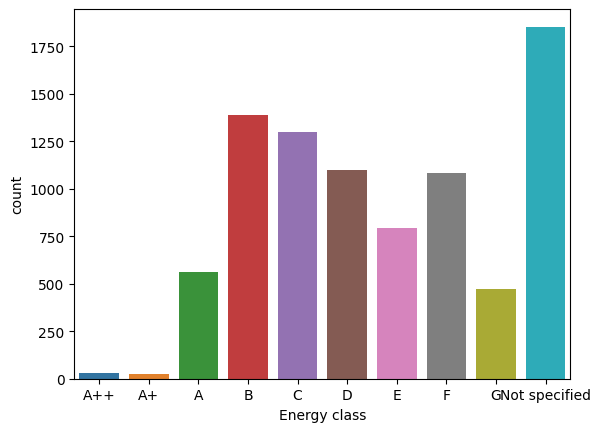

In [30]:
sns.countplot(x="Energy class", data=energy_price_df, order=ordered_E_class)

### Energy Class vs Price

[Text(0.5, 1.0, 'Energy Class versus Price'), Text(0, 0.5, 'Price in €')]

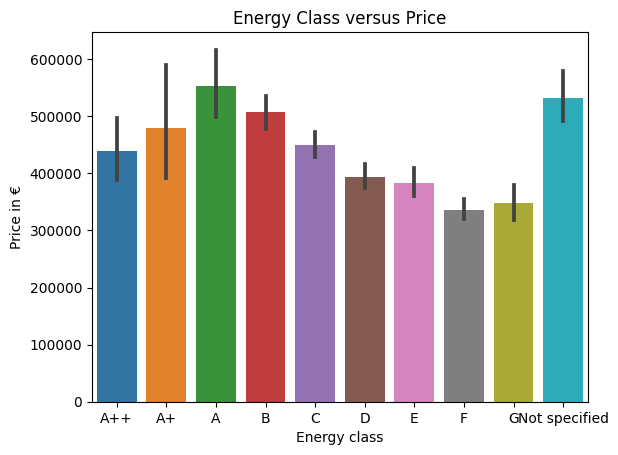

In [31]:
sns.barplot(x="Energy class", y="Price", data=energy_price_df, order=ordered_E_class).set(title = "Energy Class versus Price", ylabel='Price in €')

[Text(0.5, 1.0, 'Energy Class versus Price per Region'),
 Text(0, 0.5, 'Price in €')]

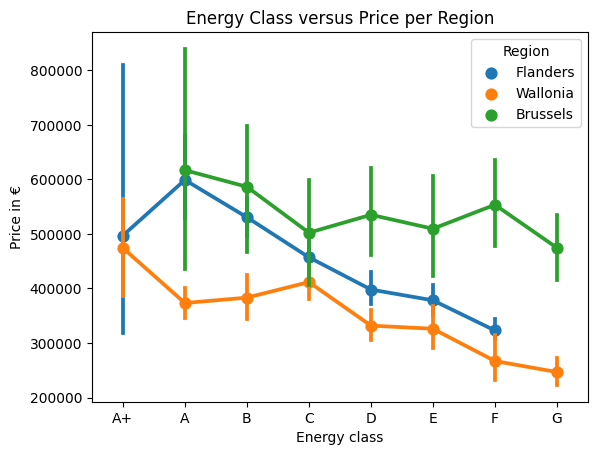

In [32]:
sns.pointplot(x="Energy class", y="Price", hue = "Region",data=energy_price_df, order=ordered_E_class_aplus_to_g,).set(title = "Energy Class versus Price per Region", ylabel='Price in €')

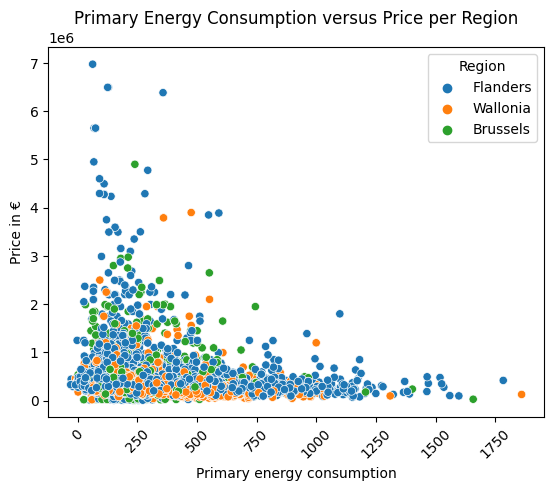

In [33]:
sns.scatterplot(x="Primary energy consumption", y="Price", hue = "Region",data=properties_raw).set(title = "Primary Energy Consumption versus Price per Region", ylabel='Price in €')
plt.xticks(rotation=45)
plt.show()

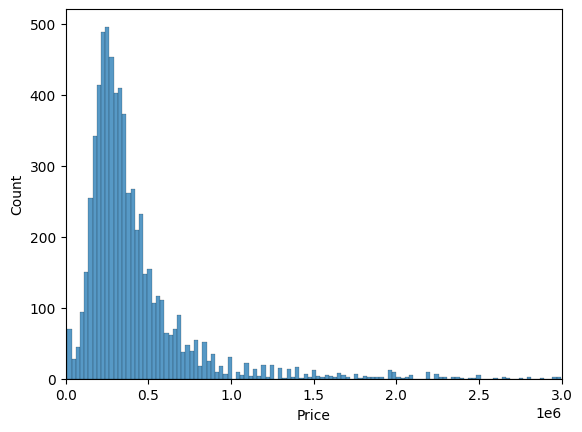

In [34]:
sns.histplot(x="Price", data=properties_raw)
plt.xlim(0, 3000000)
plt.show()

In [37]:
display(properties_raw.head(15))

,property_type,property_subtype,immo code,Location,Postcode,Province,Region,Price,Address,Energy class,...,Construction year,Building condition,Bedrooms,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price_orig
0,house,house,10666428,essen,2910,Antwerpen,Flanders,469000,Heidestatiestraat 26,D,...,0,0,3,1,0,0,2,Installed,0,€469000
1,house,house,10666426,bierges,1301,Brabant wallon,Wallonia,1395000,"Rue de Wavre, 27",C,...,1988,Good,5,2,3,1,4,Hyper equipped,Fuel oil,€1395000
2,apartment,apartment,10666424,arlon,6700,Luxembourg,Wallonia,285000,Avenue de Longwy 340,D,...,0,Good,2,2,0,0,2,Installed,Electric,€285000
3,house,house,10666423,arlon,6700,Luxembourg,Wallonia,285000,Avenue de Longwy 340,D,...,0,Good,2,2,0,0,2,Installed,Electric,€285000
4,apartment,apartment,10666422,antwerp,2000,Antwerpen,Flanders,425000,"Grote steenweg, 511",C,...,0,As new,2,1,0,0,0,Installed,0,€425000
6,house,house,10666419,grace-hollogne,4460,Liï¿½ge,Wallonia,189000,Avenue Louis Libert 1,E,...,1934,Good,2,1,0,0,0,Semi equipped,Fuel oil,€189000
7,house,villa,10666418,aywaille,4920,Liï¿½ge,Wallonia,399999,Avenue Louis Libert 1,C,...,2004,To be done up,4,1,0,1,0,Semi equipped,Fuel oil,€399999
8,house,house,10666417,boom,2850,Antwerpen,Flanders,324000,Goedehoopstraat 21,C,...,0,Good,3,1,0,1,3,0,0,€324000
9,house,mixed-use-building,10666416,boom,2850,Antwerpen,Flanders,324000,Goedehoopstraat 21,C,...,0,Good,3,1,0,1,3,0,0,€324000
10,house,house,10666410,liedekerke,1770,Vlaams-Brabant,Flanders,269000,Affligemsestraat 443,D,...,0,Good,3,1,0,0,2,0,Gas,€269000


## Export Data
The two blocks below can be turned into Code Blocks depending on how you want to export your data. Keep them as markdown if you want to use Run All (Above).

### Overwrite outputfile
"""This codeblock OVERWRITES THE EXISTING OUTPUT FILE"""
data_to_save = properties_raw
reference = ""  #add/change reference (datasource/user). Add leading underscore to increase readability
output_filename = "saved_data" + reference + ".csv" #assemble filename
data_to_save.to_csv(output_filename)

In [36]:
### Export to new timestamped file in /datadump (and overwrite existing output file)
"""This codeblock saves the dataframe in a NEW FILE WITH TIMESTAMP in the /datadump folder"""
data_to_save = properties_raw
data_to_save.to_csv("../data/saved_data.csv") #uncomment this line if you want to overwrite saved_data.csv AND create a timestamped dump
reference = ""    #add/change reference (datasource/user). Add leading underscore to increase readability
timestamp = time.strftime("%Y%m%d-%H%M%S") #add date and time of creation
output_path = "../data/datadump/"     #leave empty to save the file in the same folder as your code, 
output_filename = output_path + "saved_data_" + reference + timestamp  + ".csv" #assemble filename
data_to_save.to_csv(output_filename)